In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


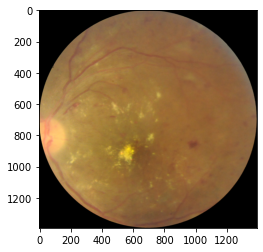

In [2]:
img = cv2.imread("../data/train_p_1/1.png")


plt.imshow(img)
plt.show()

In [3]:
def filter(image, kernel):
    kernel = kernel / (np.sum(kernel) if np.sum(kernel) != 0 else 1)
    last_image = np.zeros_like(image, dtype=np.uint8)
    for i in range(3):
        use_im = image[:, :, i]
        use_im = cv2.filter2D(use_im.astype(float), -1, kernel)
        # print(image.max(), image.min())
        last_image[:, :, i] = use_im
    return last_image

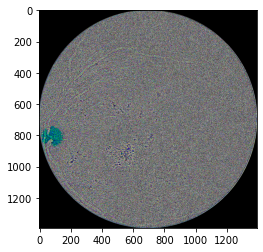

In [4]:
kernel = np.array([
                            [-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]
                            ], np.float32)

fil_img = filter(img, kernel)

plt.imshow(fil_img)
plt.show()

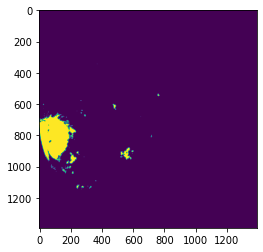

In [26]:
th_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 146, 255, cv2.THRESH_BINARY)[1]

plt.imshow(th_img)

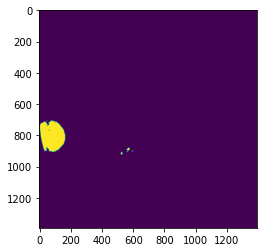

In [5]:
#cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th_img = cv2.threshold(cv2.cvtColor(cv2.threshold(img,240, 255, cv2.THRESH_BINARY)[1], cv2.COLOR_BGR2GRAY), 2, 255, cv2.THRESH_BINARY)[1]
plt.imshow(th_img)
plt.show()

In [6]:
countours, hierachy = cv2.findContours(th_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [7]:
def max_countour(countours):
    count_max = 0
    max_idx = -1
    for i, cnt in enumerate(countours):
        # count_max = max(cnt.shape[0], count_max)
        
        if cnt.shape[0] > count_max:
            count_max = cnt.shape[0]
            max_idx = i
    return countours[i]

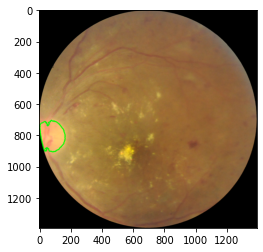

In [8]:
img_contour = cv2.drawContours(img, [max_countour(countours)], -1, (0, 255, 0), 5)

plt.imshow(img_contour)

In [9]:
[max_countour(countours)]

[array([[[ 78, 703]],
 
        [[ 78, 704]],
 
        [[ 79, 704]],
 
        ...,
 
        [[ 81, 705]],
 
        [[ 80, 704]],
 
        [[ 79, 703]]], dtype=int32)]

In [22]:
mu = cv2.moments(max_countour(countours), False)

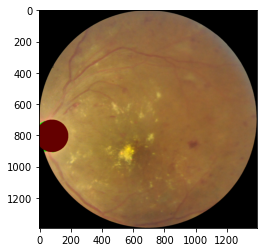

In [23]:
x,y= int(mu["m10"]/mu["m00"]) , int(mu["m01"]/mu["m00"])

cv2.circle(img, (x,y), 4, 100, 4, 4)
plt.imshow(img)
plt.show()

In [21]:
x, y

(83, 803)